<a href="https://colab.research.google.com/github/ldm2060/LearningNote/blob/main/DL%202023.6/week1/git%E7%AC%94%E8%AE%B0/note.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# WEEK 1
## 1.4 git
### 1.4.1 工作原理

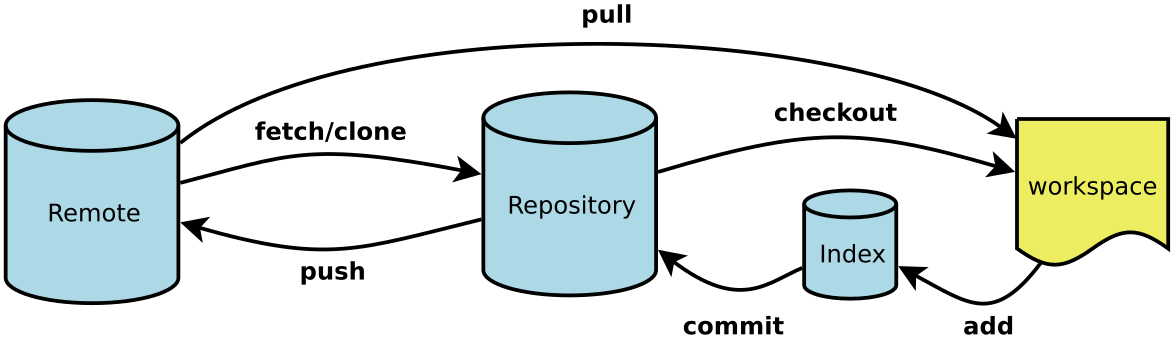

- Workspace：工作区
- Index / Stage：暂存区
- Repository：仓库区（或本地仓库）
- Remote：远程仓库

### 1.4.2 初始化

In [1]:
!git config --global user.name 'ldm2060'
!git config --global user.email 'ldm@a.com'
%cd '/home'
!mkdir gitnote
%cd './gitnote'
#!git clone https://github.com/xxxxxx
!git init

/home
/home/gitnote
Initialized empty Git repository in /home/gitnote/.git/


### 1.4.3 git操作

In [2]:
f = open("/home/gitnote/new.txt",'a')
f.write("string content")
f.write('\n')
f.close()
!git add .  # 当前目录下所有文件
!git commit -m "注释" #提交更改

[master (root-commit) eb42e28] 注释
 1 file changed, 1 insertion(+)
 create mode 100644 new.txt


In [ ]:
!git pull #拉取远程仓库更改
!git push #推送到远程仓库
!git branch -b name #创建分支
!git branch -d name #删除分支
!git push origin:name #删除远程分支
!git checkout name #切换分支
!git checkout -file #撤销修改
!git rm file #删除文件
!git reset --hard HEAD^ # 回退到上个版本，而回退到上上个版本只需把HEAD^ 改成 HEAD^^
!git reset --hard HEAD~100 # 回退到100个版本前
!git reset --hard 6fcfc89#恢复到版本号6fcfc89的版本
!git branch –set-upstream-to=origin/master new_branch #将本地新建的分支new_branch分到服务器的origin/master的分支下

In [3]:
!git branch # 查看当前目录的分支

* master


In [4]:
!git log

commit eb42e284d6d04e73318d27e7ccc399c8f9229eb5 (HEAD -> master)
Author: ldm2060 <ldm@a.com>
Date:   Sat Jun 24 02:17:05 2023 +0000

    注释


In [5]:
!git log --pretty=oneline

eb42e284d6d04e73318d27e7ccc399c8f9229eb5 (HEAD -> master) 注释


In [6]:
!git log --graph #分支情况图

* commit eb42e284d6d04e73318d27e7ccc399c8f9229eb5 (HEAD -> master)
  Author: ldm2060 <ldm@a.com>
  Date:   Sat Jun 24 02:17:05 2023 +0000
  
      注释


In [7]:
!git reflog # 查看修订版本号

eb42e28 (HEAD -> master) HEAD@{0}: commit (initial): 注释


In [8]:
!git checkout -b develop master #创建Develop分支
!git checkout master # 切换到Master分支
!git merge --no-ff develop  #在Master分支对Develop分支进行合并

Switched to a new branch 'develop'
Switched to branch 'master'
Already up to date.


In [ ]:
!git tag -a 'v1.2' # 对合并生成的新节点，做一个标签

注：使用--no-ff参数后，会执行正常合并，在Master分支上生成一个新节点。
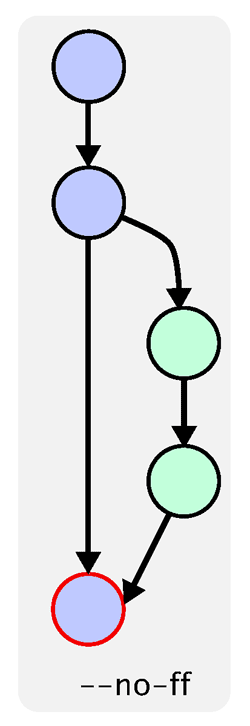

变基：当执行rebase操作时，git会从两个分支的共同祖先开始提取待变基分支上的修改，然后将待变基分支指向基分支的最新提交，最后将刚才提取的修改应用到基分支的最新提交的后面。

In [9]:
# 这两条命令等价于git rebase master develop，把master分支合并到develop分支
!git checkout develop
!git rebase master

Switched to branch 'develop'
Current branch develop is up to date.


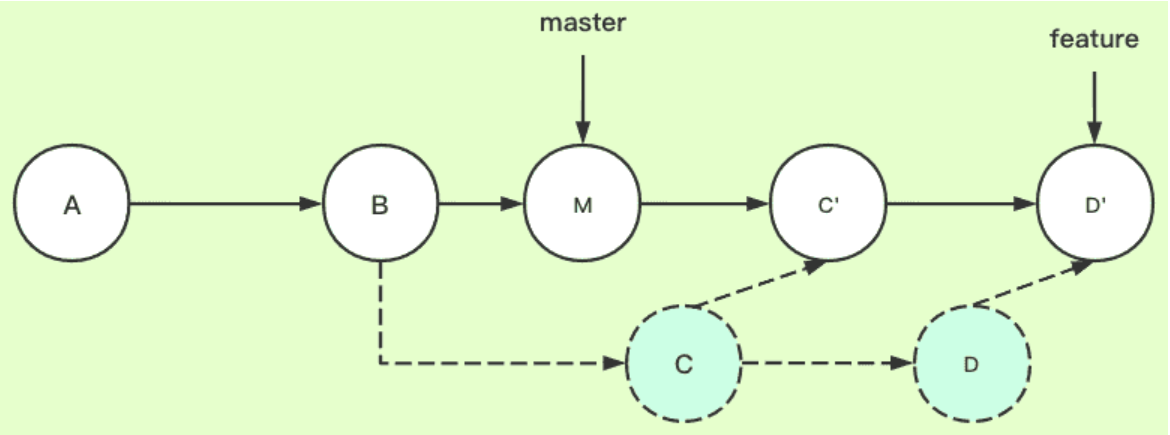
- feature：待变基分支、当前分支
- master：基分支、目标分支

即从两个分支的公共祖先（B）开始，先把基分支剩余提交接在祖先（B）后面，再把待变基分支剩余提交接在基分支最后提交（M）的后面

这样合并后的feature分支修改线将保持直线

### 1.4.4 推送到远程仓库配置

In [10]:
#创建 SSH Key
!ssh-keygen -t rsa -C "ldm@a.com"

Generating public/private rsa key pair.
Enter file in which to save the key (/root/.ssh/id_rsa): 
Created directory '/root/.ssh'.
Enter passphrase (empty for no passphrase): 
Enter same passphrase again: 
Your identification has been saved in /root/.ssh/id_rsa
Your public key has been saved in /root/.ssh/id_rsa.pub
The key fingerprint is:
SHA256:z3dCwcHB3D9Yr+jpphGaIwjk3cwH3HVfqVPG9T5Fdkc ldm@a.com
The key's randomart image is:
+---[RSA 3072]----+
|          .++o..E|
|     . . . o+o.X+|
|  .   o .   o B.+|
| o . + .     = o+|
|  o . + S . ...oo|
|   . . . = o. . .|
|    . . + +.o..  |
|       . . o+o   |
|          .+.    |
+----[SHA256]-----+


In [11]:
!cat ~/.ssh/id_rsa.pub

ssh-rsa AAAAB3NzaC1yc2EAAAADAQABAAABgQC5WnH5T1Jzouy5b6l1Oy1VVRAU9tLTOoXh/c019svE+M6+rXTw2oOc8pzZQbUpRsJ+FLL7wg+RNTjVSIMDrT6brDANoTdzc7EopAgpoEV2HCNWwZ/lLDfQN4pvdm3ye9KAVQ+X1nw/4PlfpJERmwYdE8yEqyDf3L6LjpHY/9uLHoCiY9IyIv6Io8wQTE0ApTQQ7i7aIKRSfWYB4qxTMMfoXP1DP5tslq2/t33MYiYFAHDrxMx98Ne44awTjnfwB3nn/n6Eb9dcn1qCgh7gnUs0hOj9T/juiZbrH+MjUTfHktUdqAx0mccQH/zsLqVmdLyd89i1lfSA37GxUp47UosT053wCJKkKWJLZfmwlhWLfYeeHdda2AAHN60PKWkdrXNW63r9SxbgSPpo87pAkMUd8MfoopjeuoFX8EfWMcZEbZCwgjkRbUM0lGM74swFnciW03WfrT6Qy/kM3OihlN+6fT2iQzGfYDiCmHSBX95/vGPwxU2E82yMW6lmXEgSQvs= ldm@a.com


id_rsa是私钥，id_rsa.pub是公钥，公钥填入github上对应页面即可

### 1.4.5 分支设置参考

- master（main）：正式发布
- develop：日常开发

临时性分支:

- 功能（feature）分支：为开发某种特定功能从develop分支上分出来。开发完成后，要再并入develop
- 预发布（release）分支：发布正式版本（即develop合并到master分支）之前，可能需要有一个预发布的版本进行测试
- 修补bug（fixbug）分支：正式发布以后，难免会出现bug。这时就需要创建一个分支，进行bug修补

### 1.4.6 命令总结参考
http://www.ruanyifeng.com/blog/2015/12/git-cheat-sheet.html

#### 一、新建代码库

在当前目录新建一个Git代码库
```  
 $ git init
```

新建一个目录，将其初始化为Git代码库
```  
 $ git init [project-name]
```

下载一个项目和它的整个代码历史
```  
 $ git clone [url]
```
#### 二、配置
Git的设置文件为.gitconfig，它可以在用户主目录下（全局配置），也可以在项目目录下（项目配置）。


显示当前的Git配置
```  
 $ git config --list
```

编辑Git配置文件
```  
 $ git config -e [--global]
```

设置提交代码时的用户信息
```  
 $ git config [--global] user.name "[name]"

 $ git config [--global] user.email "[email address]"
```

#### 三、增加/删除文件

添加指定文件到暂存区
```  
 $ git add [file1] [file2] ...
```

添加指定目录到暂存区，包括子目录
```  
 $ git add [dir]
```

添加当前目录的所有文件到暂存区
```  
 $ git add .
```

添加每个变化前，都会要求确认
对于同一个文件的多处变化，可以实现分次提交
```  
 $ git add -p
```  
删除工作区文件，并且将这次删除放入暂存区
```  
 $ git rm [file1] [file2] ...
```  
停止追踪指定文件，但该文件会保留在工作区
```  
 $ git rm --cached [file]
```  
改名文件，并且将这个改名放入暂存区
```  
 $ git mv [file-original] [file-renamed]
```

#### 四、代码提交

提交暂存区到仓库区
```  
 $ git commit -m [message]
```

提交暂存区的指定文件到仓库区
```  
 $ git commit [file1] [file2] ... -m [message]
```

提交工作区自上次commit之后的变化，直接到仓库区
```  
 $ git commit -a
```

提交时显示所有diff信息
```  
 $ git commit -v
```

使用一次新的commit，替代上一次提交

如果代码没有任何新变化，则用来改写上一次commit的提交信息
```  
 $ git commit --amend -m [message]
```

重做上一次commit，并包括指定文件的新变化
```  
 $ git commit --amend [file1] [file2] ...
```

#### 五、分支

列出所有本地分支
```  
 $ git branch
```

列出所有远程分支
```  
 $ git branch -r
```

列出所有本地分支和远程分支
```  
 $ git branch -a
```

新建一个分支，但依然停留在当前分支
```  
 $ git branch [branch-name]
```

新建一个分支，并切换到该分支
```  
 $ git checkout -b [branch]
```

新建一个分支，指向指定commit
```  
 $ git branch [branch] [commit]
```

新建一个分支，与指定的远程分支建立追踪关系
```  
 $ git branch --track [branch] [remote-branch]
```

切换到指定分支，并更新工作区
```  
 $ git checkout [branch-name]
```

切换到上一个分支
```  
 $ git checkout -
```

建立追踪关系，在现有分支与指定的远程分支之间
```  
 $ git branch --set-upstream [branch] [remote-branch]
```

合并指定分支到当前分支
```  
 $ git merge [branch]
```

选择一个commit，合并进当前分支
```  
 $ git cherry-pick [commit]
```

删除分支
```  
 $ git branch -d [branch-name]
```

删除远程分支
```  
 $ git push origin --delete [branch-name]

 $ git branch -dr [remote/branch]
```

#### 六、标签

列出所有tag
```  
 $ git tag
```

新建一个tag在当前commit
```  
 $ git tag [tag]
```

新建一个tag在指定commit
```  
 $ git tag [tag] [commit]
```

删除本地tag
```  
 $ git tag -d [tag]
```

删除远程tag
```  
 $ git push origin :refs/tags/[tagName]
```

查看tag信息
```  
 $ git show [tag]
```

提交指定tag
```  
 $ git push [remote] [tag]
```

提交所有tag
```  
 $ git push [remote] --tags
```

新建一个分支，指向某个tag
```  
 $ git checkout -b [branch] [tag]
```

#### 七、查看信息

显示有变更的文件
```  
 $ git status
```

显示当前分支的版本历史
```  
 $ git log
```

显示commit历史，以及每次commit发生变更的文件
```  
 $ git log --stat
```

搜索提交历史，根据关键词
```  
 $ git log -S [keyword]
```

显示某个commit之后的所有变动，每个commit占据一行
```  
 $ git log [tag] HEAD --pretty=format:%s
```

显示某个commit之后的所有变动，其"提交说明"必须符合搜索条件
```  
 $ git log [tag] HEAD --grep feature
```

显示某个文件的版本历史，包括文件改名
```  
 $ git log --follow [file]

 $ git whatchanged [file]
```

显示指定文件相关的每一次diff
```  
 $ git log -p [file]
```

显示过去5次提交
```  
 $ git log -5 --pretty --oneline
```

显示所有提交过的用户，按提交次数排序
```  
 $ git shortlog -sn
```

显示指定文件是什么人在什么时间修改过
```  
 $ git blame [file]
```

显示暂存区和工作区的差异
```  
 $ git diff
```

显示暂存区和上一个commit的差异
```  
 $ git diff --cached [file]
```

显示工作区与当前分支最新commit之间的差异
```  
 $ git diff HEAD
```

显示两次提交之间的差异
```  
 $ git diff [first-branch]...[second-branch]
```

显示今天你写了多少行代码
```  
 $ git diff --shortstat "@{0 day ago}"
```

显示某次提交的元数据和内容变化
```  
 $ git show [commit]
```

显示某次提交发生变化的文件
```  
 $ git show --name-only [commit]
```

显示某次提交时，某个文件的内容
```  
 $ git show [commit]:[filename]
```

显示当前分支的最近几次提交
```  
 $ git reflog
```

#### 八、远程同步

下载远程仓库的所有变动
```  
 $ git fetch [remote]
```

显示所有远程仓库
```  
 $ git remote -v
```

显示某个远程仓库的信息
```  
 $ git remote show [remote]
```

增加一个新的远程仓库，并命名
```  
 $ git remote add [shortname] [url]
```

取回远程仓库的变化，并与本地分支合并
```  
 $ git pull [remote] [branch]
```

上传本地指定分支到远程仓库
```  
 $ git push [remote] [branch]
```

强行推送当前分支到远程仓库，即使有冲突
```  
 $ git push [remote] --force
```

推送所有分支到远程仓库
```  
 $ git push [remote] --all
```

#### 九、撤销

恢复暂存区的指定文件到工作区
```  
 $ git checkout [file]
```

恢复某个commit的指定文件到暂存区和工作区
```  
 $ git checkout [commit] [file]
```

恢复暂存区的所有文件到工作区
```  
 $ git checkout .
```

重置暂存区的指定文件，与上一次commit保持一致，但工作区不变
```  
 $ git reset [file]
```

重置暂存区与工作区，与上一次commit保持一致
```  
 $ git reset --hard
```

重置当前分支的指针为指定commit，同时重置暂存区，但工作区不变
```  
 $ git reset [commit]
```

重置当前分支的HEAD为指定commit，同时重置暂存区和工作区，与指定commit一致
```  
 $ git reset --hard [commit]
```

重置当前HEAD为指定commit，但保持暂存区和工作区不变
```  
 $ git reset --keep [commit]
```

新建一个commit，用来撤销指定commit

后者的所有变化都将被前者抵消，并且应用到当前分支
```  
 $ git revert [commit]
```

暂时将未提交的变化移除，稍后再移入

 $ git stash
```  
 $ git stash pop
```

#### 十、其他

生成一个可供发布的压缩包
```  
 $ git archive
```
（完）
